In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,Dropout,GlobalMaxPool2D,Input,Flatten
from tensorflow.keras.models import Model

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
cifar = tf.keras.datasets.cifar10

In [5]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()

In [4]:
x_train,x_test = x_train/255.0 , x_test/255.0

In [9]:
y_train,y_test = y_train.flatten(),y_test.flatten()

In [10]:
# x_train = np.expand_dims(x_train,-1)
# x_test = np.expand_dims(x_test,-1)
# print(x_train.shape)

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
k = len(set(y_train))
print(f'The No. of classes = {k}')

The No. of classes = 10


In [13]:
i = Input(x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 1024)              118067

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5057 - accuracy: 0.4558 - val_loss: 1.2602 - val_accuracy: 0.5431
Epoch 2/15
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1587 - accuracy: 0.5856 - val_loss: 1.0732 - val_accuracy: 0.6130
Epoch 3/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9950 - accuracy: 0.6465 - val_loss: 0.9769 - val_accuracy: 0.6543
Epoch 4/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8651 - accuracy: 0.6936 - val_loss: 0.8976 - val_accuracy: 0.6838
Epoch 5/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7535 - accuracy: 0.7332 - val_loss: 0.9098 - val_accuracy: 0.6813
Epoch 6/15
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6648 - accuracy: 0.7662 - val_loss: 0.8789 - val_accuracy: 0.6980
Epoch 7/15
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5796 - accuracy: 0.7937 - val_loss: 0.9097 -

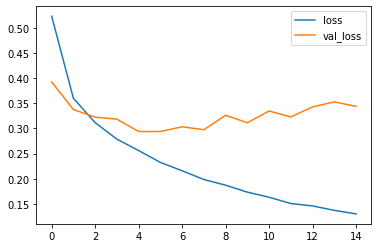

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

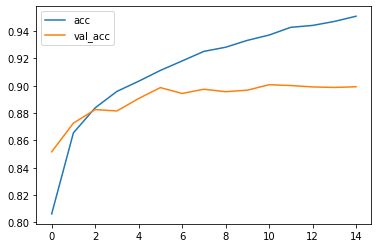

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[889   1  22  14   2   3  66   0   3   0]
 [  2 974   0  13   4   0   4   0   3   0]
 [ 19   1 864   8  59   0  49   0   0   0]
 [ 17   3  21 888  38   3  28   0   2   0]
 [  1   1  59  15 843   0  79   0   2   0]
 [  0   0   0   0   0 981   0  13   0   6]
 [133   1  79  22  88   0 667   0  10   0]
 [  0   0   0   0   0  19   0 949   0  32]
 [  7   1   5   2   4   4   2   1 974   0]
 [  1   0   0   0   0   5   0  31   0 963]]


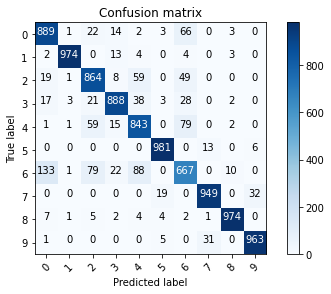

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [17]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

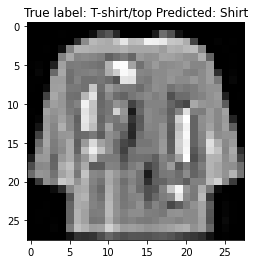

In [18]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));